In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
%matplotlib inline
from pylab import mpl, plt
import datetime
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, RMSprop
import random

In [2]:
path = '../data/'

In [3]:
djia = pd.read_csv(path+'djia_.csv')
djia

Date          Open          High           Low         Close  \
0     2010-01-04  10430.690430  10641.620117  10430.690430  10583.959961   
1     2010-01-05  10584.559570  10647.139648  10468.860352  10572.019531   
2     2010-01-06  10564.719727  10655.219727  10488.280273  10573.679688   
3     2010-01-07  10571.110352  10655.599609  10471.730469  10606.860352   
4     2010-01-08  10606.400391  10653.110352  10509.740234  10618.190430   
...          ...           ...           ...           ...           ...   
2258  2018-12-21  22871.740234  23285.759766  22356.619141  22445.369141   
2259  2018-12-24  22317.279297  22438.759766  21751.589844  21792.199219   
2260  2018-12-26  21857.730469  22887.060547  21668.529297  22878.449219   
2261  2018-12-27  22629.060547  23144.720703  22233.449219  23138.820313   
2262  2018-12-28  23213.609375  23426.169922  22928.179688  23062.400391   

         Adj Close      Volume  
0     10583.959961  3991400000  
1     10572.019531  2491020000  
2     10573.679688  4972660000  
3     10606.860352  5270680000  
4     10618.190430  4389590000  
...            ...         ...  
2258  22445.369141  7609010000  
2259  21792.199219  2613930000  
2260  22878.449219  4233990000  
2261  23138.820313  4096610000  
2262  23062.400391  3702620000  

[2263 rows x 7 columns]

In [4]:
djia.dropna(axis=0, how='all', inplace=True)
djia.dropna(axis=1, how='any', inplace=True)
djia.isna().sum().sum()

0

In [5]:
djia.set_index('Date', inplace=True)

In [6]:
djia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2263 entries, 2010-01-04 to 2018-12-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2263 non-null   float64
 1   High       2263 non-null   float64
 2   Low        2263 non-null   float64
 3   Close      2263 non-null   float64
 4   Adj Close  2263 non-null   float64
 5   Volume     2263 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 123.8+ KB


In [7]:
djia_close = djia[['Close']].copy()

In [8]:
djia_close.rename(columns={'Close' : 'price'}, inplace=True)

In [9]:
djia_close['return'] = np.log(djia_close[['price']] / 
                            djia_close[['price']].shift(1))

In [10]:
djia_close['direction'] = np.where(djia_close['return']> 0, 1, 0)

In [11]:
lags = 5

In [12]:
cols = []

In [13]:
for lag in range(1, lags + 1):
    col = f'lag_{lag}'
    djia_close[col] = djia_close['return'].shift(lag)
    cols.append(col)
djia_close.dropna(inplace=True)

In [14]:
djia_close.round(4).tail()

price  return  direction   lag_1   lag_2   lag_3   lag_4  \
Date                                                                        
2018-12-21  22445.3691 -0.0183          0 -0.0201 -0.0150  0.0035 -0.0213   
2018-12-24  21792.1992 -0.0295          0 -0.0183 -0.0201 -0.0150  0.0035   
2018-12-26  22878.4492  0.0486          1 -0.0295 -0.0183 -0.0201 -0.0150   
2018-12-27  23138.8203  0.0113          1  0.0486 -0.0295 -0.0183 -0.0201   
2018-12-28  23062.4004 -0.0033          0  0.0113  0.0486 -0.0295 -0.0183   

             lag_5  
Date                
2018-12-21 -0.0204  
2018-12-24 -0.0213  
2018-12-26  0.0035  
2018-12-27 -0.0150  
2018-12-28 -0.0201

C:\Users\JBarr\anaconda3\envs\dev\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\JBarr\anaconda3\envs\dev\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\JBarr\anaconda3\envs\dev\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\JBarr\anaconda3\envs\dev\lib\site-packages\tensorflow\python\framework

In [17]:
optimizer = Adam(learning_rate=0.0001)

In [18]:
def set_seeds(seed=100):
    random.seed(seed)
    np.random.seed(seed)
    tf.set_random_seed(100)

In [19]:
set_seeds()
model = Sequential()
model.add(Dense(64, activation='relu',
               input_shape=(lags,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizer,
             loss='binary_crossentropy',
             metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [20]:
cutoff = '2017-10-31'

In [21]:
training_data = djia_close[djia_close.index < cutoff].copy()

In [22]:
mu, std = training_data.mean(), training_data.std()

In [23]:
training_data_ = (training_data - mu) / std

In [24]:
test_data = djia_close[djia_close.index >= cutoff].copy()

In [25]:
test_data_ = (test_data - mu) / std

In [26]:
%%time
model.fit(training_data[cols],
          training_data['direction'],
          epochs=300, verbose=False,
          validation_split=0.2, shuffle=False)


Wall time: 9.41 s


In [27]:
res = pd.DataFrame(model.history.history)

In [28]:
res


val_loss  val_accuracy      loss  accuracy
0    0.692557      0.547074  0.692976  0.526718
1    0.692011      0.547074  0.692505  0.538168
2    0.691474      0.547074  0.692070  0.538168
3    0.690982      0.547074  0.691670  0.538168
4    0.690559      0.547074  0.691328  0.538168
..        ...           ...       ...       ...
295  0.687805      0.534351  0.687077  0.549618
296  0.687803      0.534351  0.687064  0.549618
297  0.687803      0.534351  0.687051  0.549618
298  0.687799      0.534351  0.687040  0.549618
299  0.687796      0.534351  0.687027  0.550254

[300 rows x 4 columns]

<AxesSubplot:>

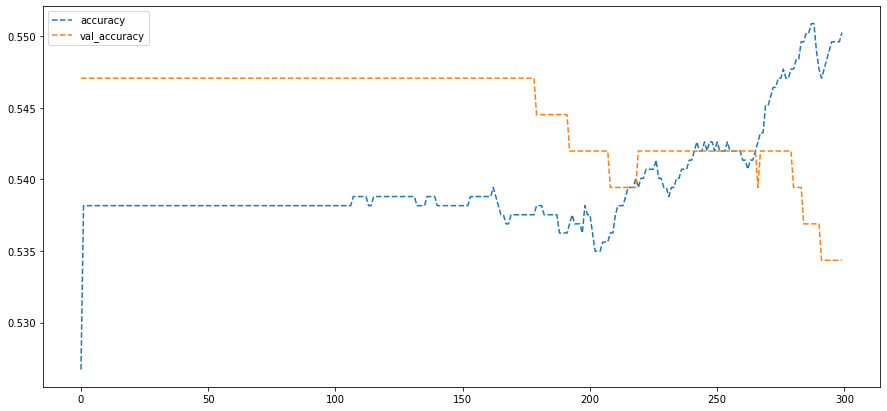

In [29]:
res[['accuracy', 'val_accuracy']].plot(figsize=(15,7), style='--')

In [30]:
model.evaluate(training_data_[cols], training_data['direction'])

1965/1965 [==============================] - 0s 8us/step


[2.2884131854423737, 0.5180661678314209]

In [31]:
pred = np.where(model.predict(training_data_[cols]) > 0.5, 1, 0)

In [32]:
pred[:30].flatten()

array([0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1])

In [33]:
training_data['prediction'] = np.where(pred > 0, 1, -1)

In [34]:
training_data['strategy'] = (training_data['prediction'] * 
                            training_data['return'])

In [35]:
 training_data[['return', 'strategy']].sum().apply(np.exp)

return      2.189494
strategy    2.204221
dtype: float64

<AxesSubplot:xlabel='Date'>

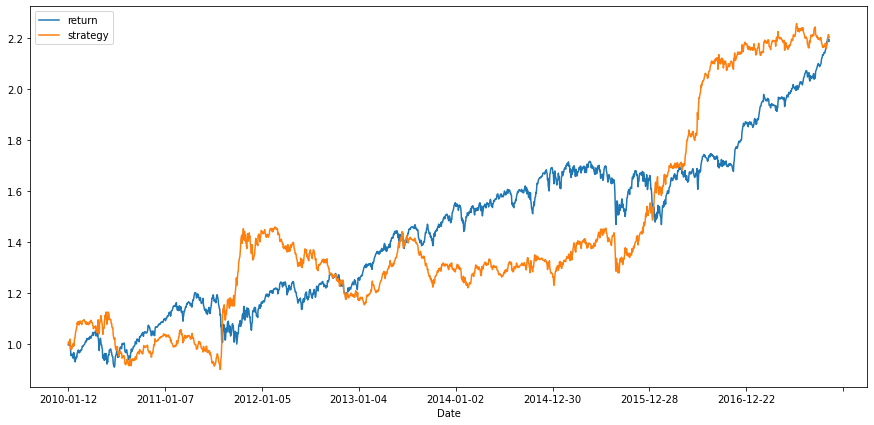

In [36]:
 training_data[['return', 'strategy']].cumsum().apply(np.exp).plot(figsize=(15,7))

In [37]:
model.evaluate(test_data_[cols], test_data['direction'])

292/292 [==============================] - 0s 17us/step


[3.1507001641678483, 0.44863012433052063]

In [38]:
pred = np.where(model.predict(test_data_[cols]) > 0.5, 1, 0 )

In [39]:
test_data['prediction'] = np.where(pred > 0, 1, -1)

In [40]:
test_data['prediction'].value_counts()

 1    172
-1    120
Name: prediction, dtype: int64

In [41]:
test_data['strategy'] = (test_data['prediction'] * 
                        test_data['return'])

In [42]:
test_data[['return', 'strategy']].sum().apply(np.exp)

return      0.987736
strategy    0.806534
dtype: float64

<AxesSubplot:xlabel='Date'>

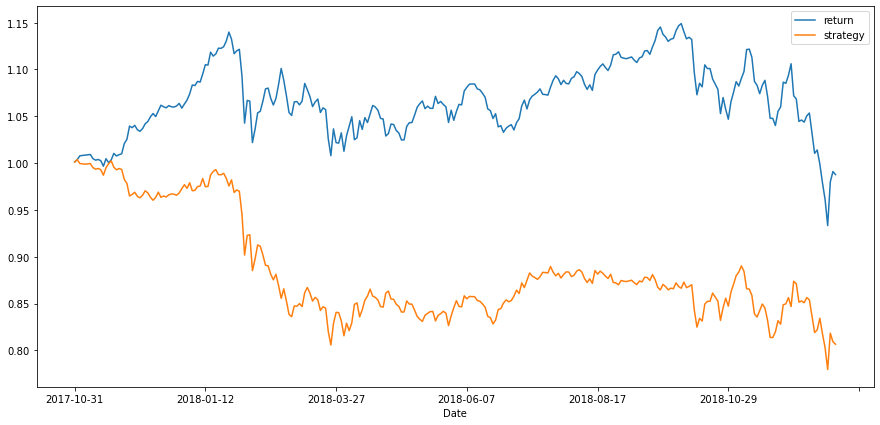

In [43]:
test_data[['return', 'strategy']].cumsum().apply(np.exp).plot(figsize=(15,7))

In [44]:
# Adding Different Types of Fetures 
djia_close['momentum'] = djia_close['return'].rolling(5).mean().shift(1)

In [45]:
djia_close['volatility'] = djia_close['return'].rolling(20).std().shift(1)

In [46]:
djia_close['distance'] = (djia_close['price'] - 
                          djia_close['price'].rolling(50).mean()).shift(1)

In [47]:
djia_close.dropna(inplace=True)


In [48]:
cols.extend(['momentum', 'volatility', 'distance'])

In [49]:

print(djia_close
      .round(4).tail())

                 price  return  direction   lag_1   lag_2   lag_3   lag_4  \
Date                                                                        
2018-12-21  22445.3691 -0.0183          0 -0.0201 -0.0150  0.0035 -0.0213   
2018-12-24  21792.1992 -0.0295          0 -0.0183 -0.0201 -0.0150  0.0035   
2018-12-26  22878.4492  0.0486          1 -0.0295 -0.0183 -0.0201 -0.0150   
2018-12-27  23138.8203  0.0113          1  0.0486 -0.0295 -0.0183 -0.0201   
2018-12-28  23062.4004 -0.0033          0  0.0113  0.0486 -0.0295 -0.0183   

             lag_5  momentum  volatility   distance  
Date                                                 
2018-12-21 -0.0204   -0.0147      0.0144 -2124.1907  
2018-12-24 -0.0213   -0.0142      0.0147 -2475.3537  
2018-12-26  0.0035   -0.0159      0.0158 -3063.3110  
2018-12-27 -0.0150   -0.0069      0.0195 -1927.8302  
2018-12-28 -0.0201   -0.0016      0.0197 -1625.2245  


In [50]:
training_data_new = djia_close[djia_close.index < cutoff].copy()

In [51]:
mu, std = training_data_new.mean(), training_data_new.std()

In [52]:
new_training_data_ = (training_data_new - mu) / std

In [53]:
test_data = djia_close[djia_close.index >= cutoff].copy()

In [54]:
test_data_

price    return  direction     lag_1     lag_2     lag_3  \
Date                                                                      
2017-10-31  2.413964  0.094139   0.922818 -0.465030  0.117020  0.304188   
2017-11-01  2.431477  0.237259   0.922818  0.093676 -0.465010  0.117015   
2017-11-02  2.460693  0.424801   0.922818  0.236796  0.093696 -0.465014   
2017-11-03  2.463060 -0.007686   0.922818  0.424339  0.236817  0.093692   
2017-11-06  2.465859 -0.000775   0.922818 -0.008150  0.424360  0.236812   
...              ...       ...        ...       ...       ...       ...   
2018-12-21  2.131456 -2.142411  -1.083086 -2.350449 -1.763535  0.354831   
2018-12-24  1.933439 -3.431760  -1.083086 -2.142884 -2.350433 -1.763537   
2018-12-26  2.262749  5.531495   0.922818 -3.432238 -2.142867 -2.350434   
2018-12-27  2.341684  1.251756   0.922818  5.531053 -3.432224 -2.142869   
2018-12-28  2.318516 -0.425022  -1.083086  1.251296  5.531085 -3.432224   

               lag_4     lag_5  
Date                            
2017-10-31 -0.597103  0.777878  
2017-11-01  0.303926 -0.596705  
2017-11-02  0.116736  0.304455  
2017-11-03 -0.465346  0.117238  
2017-11-06  0.093411 -0.464929  
...              ...       ...  
2018-12-21 -2.487000 -2.386325  
2018-12-24  0.354574 -2.486878  
2018-12-26 -1.763986  0.355111  
2018-12-27 -2.350936 -1.763759  
2018-12-28 -2.143352 -2.350795  

[292 rows x 8 columns]

In [55]:
test_data_ = (test_data - mu) / std

In [57]:
set_seeds()
model = Sequential()
model.add(Dense(32, activation='relu',
                input_shape=(len(cols),)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizer,
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [58]:
%%time
model.fit(new_training_data_[cols], training_data_new['direction'],
          verbose=False, epochs=25)

Wall time: 1.13 s


In [59]:
model.evaluate(new_training_data_[cols], training_data_new['direction'])

1915/1915 [==============================] - 0s 21us/step


[0.6799437691897698, 0.567624032497406]

In [60]:
pred = np.where(model.predict(new_training_data_[cols]) > 0.5, 1, 0)

In [61]:
training_data_new['prediction'] = np.where(pred > 0, 1, -1)

In [62]:
training_data_new['strategy'] = (training_data_new['prediction'] *
                             training_data_new['return'])
                             


In [63]:
training_data_new[['return', 'strategy']].sum().apply(np.exp)

return      2.154708
strategy    4.628474
dtype: float64

<AxesSubplot:xlabel='Date'>

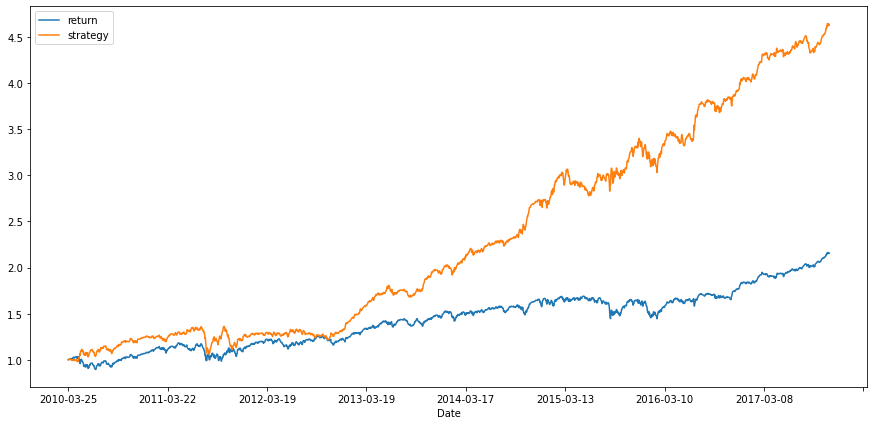

In [64]:
training_data_new[['return', 'strategy']].cumsum().apply(np.exp).plot(figsize=(15,7))

In [65]:
test_data

price    return  direction     lag_1     lag_2     lag_3  \
Date                                                                          
2017-10-31  23377.240234  0.001220          1 -0.003653  0.001423  0.003056   
2017-11-01  23435.009766  0.002468          1  0.001220 -0.003653  0.001423   
2017-11-02  23531.380859  0.004104          1  0.002468  0.001220 -0.003653   
2017-11-03  23539.189453  0.000332          1  0.004104  0.002468  0.001220   
2017-11-06  23548.419922  0.000392          1  0.000332  0.004104  0.002468   
...                  ...       ...        ...       ...       ...       ...   
2018-12-21  22445.369141 -0.018287          0 -0.020097 -0.014978  0.003497   
2018-12-24  21792.199219 -0.029532          0 -0.018287 -0.020097 -0.014978   
2018-12-26  22878.449219  0.048643          1 -0.029532 -0.018287 -0.020097   
2018-12-27  23138.820313  0.011316          1  0.048643 -0.029532 -0.018287   
2018-12-28  23062.400391 -0.003308          0  0.011316  0.048643 -0.029532   

               lag_4     lag_5  momentum  volatility     distance  
Date                                                               
2017-10-31 -0.004802  0.007184  0.000642    0.003386   880.433007  
2017-11-01  0.003056 -0.004802 -0.000551    0.003355   875.463203  
2017-11-02  0.001423  0.003056  0.000903    0.003356   902.530352  
2017-11-03 -0.003653  0.001423  0.001112    0.003314   964.515624  
2017-11-06  0.001220 -0.003653  0.000894    0.003304   937.208437  
...              ...       ...       ...         ...          ...  
2018-12-21 -0.021284 -0.020407 -0.014654    0.014375 -2124.190664  
2018-12-24  0.003497 -0.021284 -0.014230    0.014726 -2475.353711  
2018-12-26 -0.014978  0.003497 -0.015879    0.015766 -3063.311015  
2018-12-27 -0.020097 -0.014978 -0.006850    0.019454 -1927.830195  
2018-12-28 -0.018287 -0.020097 -0.001591    0.019666 -1625.224492  

[292 rows x 11 columns]

In [66]:
model.evaluate(test_data_[cols], test_data_['direction'])

292/292 [==============================] - 0s 10us/step


[0.818775327238318, 0.0]

In [67]:
pred = np.where(model.predict(test_data_[cols]) > 0.5, 1 , 0)

In [68]:
test_data['prediction'] = np.where(pred > 0, 1, -1)

In [69]:
test_data['prediction'].value_counts()

 1    240
-1     52
Name: prediction, dtype: int64

In [70]:
test_data['strategy'] = (test_data['prediction'] * 
                        test_data['return'])

In [71]:
 test_data[['return', 'strategy']].sum().apply(np.exp)

return      0.987736
strategy    1.064827
dtype: float64

<AxesSubplot:xlabel='Date'>

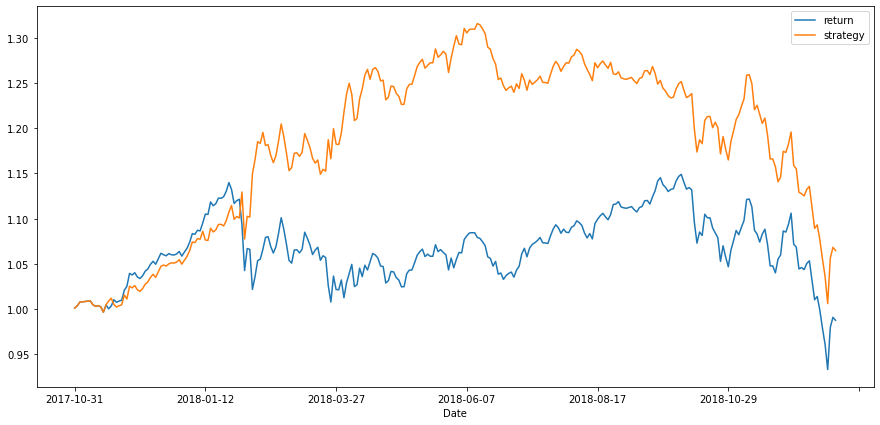

In [72]:
 test_data[['return', 'strategy']].cumsum().apply(np.exp).plot(figsize=(15,7))